In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [75]:
data_frame=pd.DataFrame(pd.read_csv('/content/train.csv'))
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
data_frame.shape

(891, 12)

In [32]:
x=data_frame.isnull().sum()
print(x)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [33]:
data_frame.fillna(0)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
col=x[x>(35/100*data_frame.shape[0])]

In [35]:
col

Cabin    687
dtype: int64

In [36]:
col.index

Index(['Cabin'], dtype='object')

In [37]:
data_frame.drop(col.index,axis=1,inplace=True)
data_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [38]:
data_frame.fillna(data_frame.mean(),inplace=True)
data_frame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [39]:
data_frame['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [40]:
data_frame['Embarked'].fillna('s',inplace=True)

In [41]:
data_frame.fillna(data_frame.mean(),inplace=True)
data_frame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [62]:
#Over all Total mean
data_frame['Fare'].mean()

32.2042079685746

In [44]:
data_frame.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


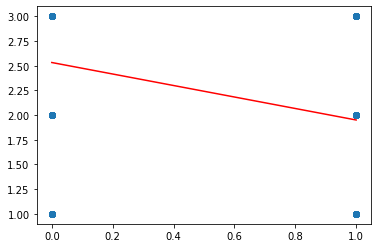

In [74]:
ls=(data_frame.corr()).index
x=data_frame[ls[1]]
y=data_frame[ls[2]]
plt.scatter(x, y)
  
plt.plot(np.unique(x),np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

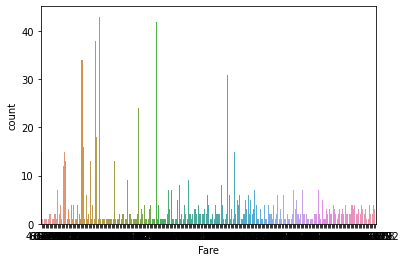

In [49]:
sb.countplot(data = data_frame, x = 'Fare');

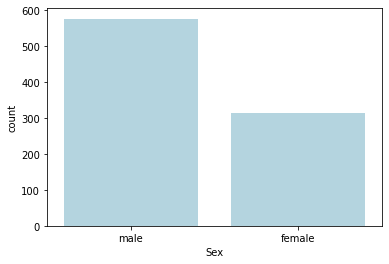

In [50]:

base_color = sb.color_palette()[2]
sb.countplot(data = data_frame, x = 'Sex', color = 'lightblue')

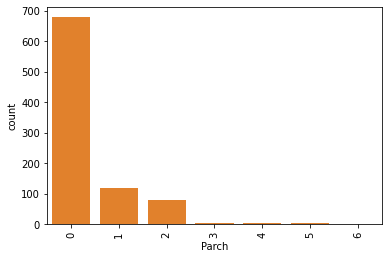

In [52]:
base_color = sb.color_palette()[1]
sb.countplot(data = data_frame, x = 'Parch', color = base_color)
plt.xticks(rotation=90);

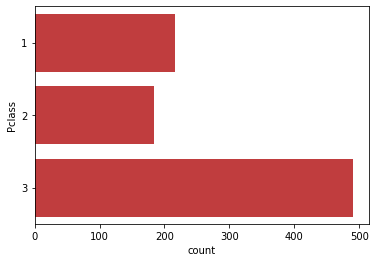

In [56]:
base_color = sb.color_palette()[3]
sb.countplot(data = data_frame, y = 'Pclass', color = base_color)

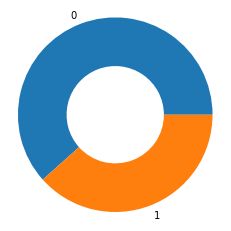

In [57]:
sorted_counts = data_frame['Survived'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, wedgeprops = {'width' : 0.5});
plt.axis('square');